# Prediksi Cuaca dengan Artificial Neural Network

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score, confusion_matrix
from tensorflow.keras.utils import plot_model

## Exploratory Data Analysis

In [2]:
# Load dataset
dataset = pd.read_csv("weatherAUS.csv")

In [3]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [6]:
#cek data yang NaN
dataset.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

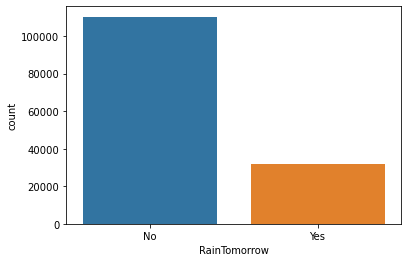

In [7]:
sns.countplot(x='RainTomorrow', data=dataset)

## Data Preprocessing

In [8]:
# buang kolom Date dan Location 
dataset.drop(['Date', 'Location'], axis=1, inplace=True)

In [9]:
dataset.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [10]:
dataset[["RainToday","RainTomorrow"]]

,RainToday,RainTomorrow
0,No,No
1,No,No
2,No,No
3,No,No
4,No,No
...,...,...
145455,No,No
145456,No,No
145457,No,No
145458,No,No


### Mengatasi data dengan nilai NaN

In [11]:
# function untuk input nilai NaN dengan mean
def impute_means(data, columns):
    for column in columns:
        data[column] = data[column].fillna(data[column].mean())

In [12]:
# ganti nilai NaN di feature numerik
nan_column = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am', 'WindSpeed3pm',
              'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
impute_means(dataset, nan_column)
dataset.isna().sum()

MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

In [13]:
# hapus sampel yang ada nilai NaN
dataset=dataset.dropna()
dataset.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

### Encoding Feature

In [14]:
# encoding RainTommorow dan Rain Today
dataset['RainTomorrow'] = dataset['RainTomorrow'].map({'Yes': 1, 'No': 0})
dataset['RainToday'] = dataset['RainToday'].map({'Yes': 1, 'No': 0})

In [15]:
def onehot_encoder(data, columns):
    for column in columns:
        dummies = pd.get_dummies(data[column])
        data = pd.concat([data, dummies], axis=1)
        data.drop(column, axis=1, inplace=True)
    return data

In [16]:
categorical_feature = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
dataset = onehot_encoder(dataset, categorical_feature)

In [17]:
dataset.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0


### Normalisasi Feature

In [18]:
# Pisah data X (feature), y (target)
X = dataset.drop(columns='RainTomorrow')
y = dataset['RainTomorrow']

In [19]:
scaler = preprocessing.MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [20]:
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0.516509,0.523629,0.001632,0.063437,0.524909,0.289062,0.211765,0.258824,0.71,0.22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.375000,0.565217,0.000000,0.063437,0.524909,0.289062,0.023529,0.235294,0.44,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.504717,0.576560,0.000000,0.063437,0.524909,0.304688,0.200000,0.282353,0.38,0.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.417453,0.620038,0.000000,0.063437,0.524909,0.132812,0.105882,0.082353,0.45,0.16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.613208,0.701323,0.002720,0.063437,0.524909,0.265625,0.058824,0.211765,0.82,0.33,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train Test Split

In [21]:
#train test split data all feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=np.array(y),random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=np.array(y_train),random_state=1)

## Train Model

In [22]:
# buat model
visible = Input(shape=(65,))
hidden1 = Dense(30, activation='relu')(visible)
hidden2 = Dense(15, activation='relu')(hidden1)
hidden3 = Dense(5, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
model=Model(inputs=visible, outputs=output)

In [23]:
# compile model
model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
model.save("model_weather.h5")
checkpoint_cb = keras.callbacks.ModelCheckpoint("model.h5",save_best_only=True)
# fit model
history = model.fit(x=X_train, y=y_train,
                     validation_data=(X_val, y_val),
                     callbacks=[checkpoint_cb],
                     batch_size=32, epochs=50, verbose=1)

Epoch 1/50
2320/2320 [==============================] - 13s 6ms/step - loss: 0.3913 - accuracy: 0.8288 - val_loss: 0.3673 - val_accuracy: 0.8446
Epoch 2/50
2320/2320 [==============================] - 13s 5ms/step - loss: 0.3612 - accuracy: 0.8436 - val_loss: 0.3591 - val_accuracy: 0.8455
Epoch 3/50
2320/2320 [==============================] - 12s 5ms/step - loss: 0.3532 - accuracy: 0.8469 - val_loss: 0.3534 - val_accuracy: 0.8485
Epoch 4/50
2320/2320 [==============================] - 14s 6ms/step - loss: 0.3494 - accuracy: 0.8483 - val_loss: 0.3529 - val_accuracy: 0.8485
Epoch 5/50
2320/2320 [==============================] - 15s 6ms/step - loss: 0.3458 - accuracy: 0.8503 - val_loss: 0.3501 - val_accuracy: 0.8498
Epoch 6/50
2320/2320 [==============================] - 16s 7ms/step - loss: 0.3435 - accuracy: 0.8509 - val_loss: 0.3471 - val_accuracy: 0.8511
Epoch 7/50
2320/2320 [==============================] - 13s 6ms/step - loss: 0.3418 - accuracy: 0.8514 - val_loss: 0.3593 - val_ac

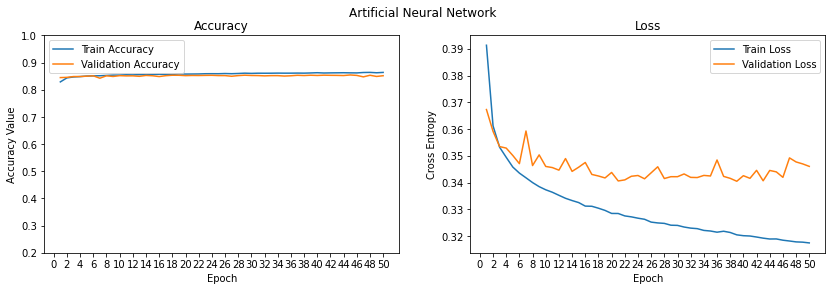

In [25]:
epoch_list = list(range(1,51)) # EPOCH = 50
y_train_acc = history.history['accuracy']
y_val_acc = history.history['val_accuracy']
y_train_loss = history.history['loss']
y_val_loss = history.history['val_loss']

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
t = f.suptitle('Artificial Neural Network', fontsize=12)

ax1.plot(epoch_list, y_train_acc, label='Train Accuracy')
ax1.plot(epoch_list, y_val_acc, label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 51, 2))
ax1.set_ylim(0.2,1)
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, y_train_loss, label='Train Loss')
ax2.plot(epoch_list, y_val_loss, label='Validation Loss')
ax2.set_xticks(np.arange(0, 51, 2))
#ax2.set_ylim(0,1)
ax2.set_ylabel('Cross Entropy')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

plt.savefig('acc_loss.png')

In [26]:
print("Max ANN Validation Acc :",max(y_val_acc),"pada epoch =",y_val_acc.index(max(y_val_acc))+1)

Max ANN Validation Acc : 0.8542963266372681 pada epoch = 45


In [27]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

Text(33.0, 0.5, 'True Value')

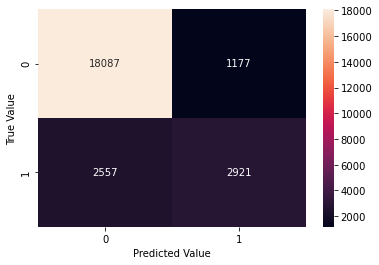

In [28]:
matrix_model=confusion_matrix(y_test, y_pred)
sns.heatmap(matrix_model, annot=True, fmt="d");
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

In [29]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,  y_pred)
recall = recall_score(y_test,  y_pred)
f1 =  f1_score(y_test,  y_pred)
print('Accuracy: %.3f ' % (accuracy*100))
print('Precision: %.3f ' % (precision*100))
print('Recall: %.3f ' % (recall*100))
print('F1 Score: %.3f ' % (f1*100))

Accuracy: 84.908 
Precision: 71.279 
Recall: 53.322 
F1 Score: 61.007 


In [ ]:
plot_model(model, show_shapes=True)